#  <font color='#eb3483'> Hyperparameter Optimization </font>
In this notebook we go through a sample machine learning pipeline - first cleaning our data, and then exploring different options for hyperparameter optimization. Automation is your friend! Pay extra attention to the functions we use that abstract away the need to code every little detail during data cleaning and hyperparameter testing.

In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")

# <font color='#eb3483'> Census Data </font>

We are going to use the [Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income). Is a dataset with demographic information for 50,000 people in the US. The target variable (`'salary'`)is whether the person earns more than $50K /year or not. It's a binary classification problem. Let's start by loading in our data:

In [ ]:
census = pd.read_csv("data/census_salary.csv").sample(10000) #We're just going to use 10K data points

In [ ]:
census.head()

In [ ]:
census.columns

In [ ]:
census.shape

# <font color='#eb3483'> Step 1: Ready to answer question? </font>


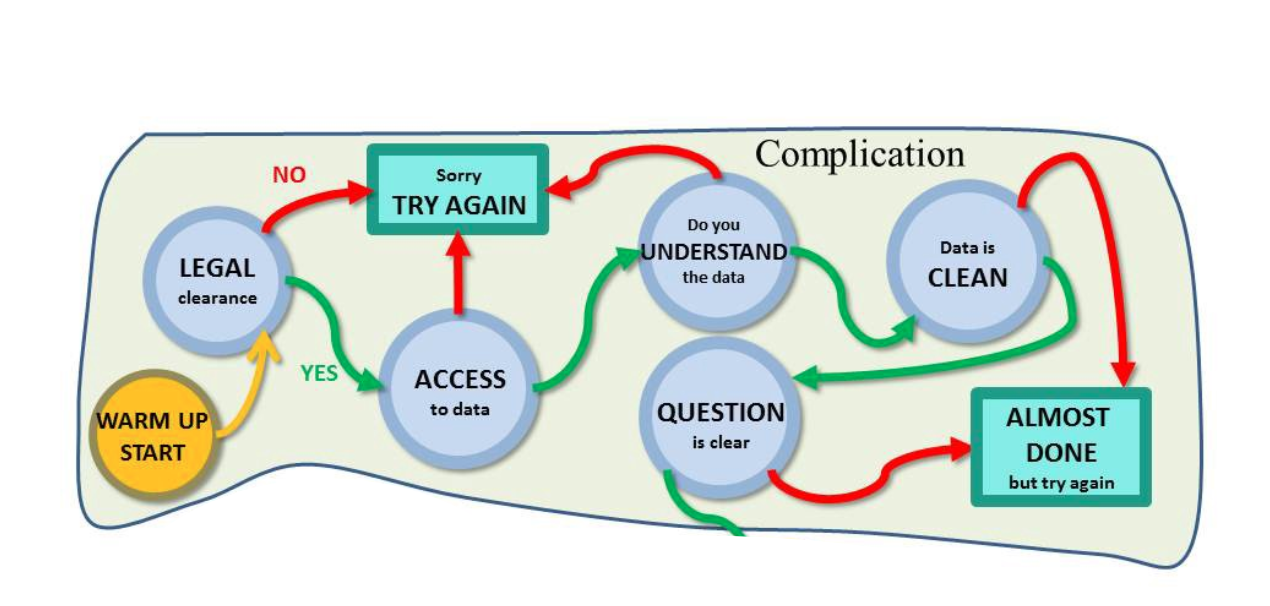

# <font color='#eb3483'> Step 2: Getting our data ready (preprocessing) </font>

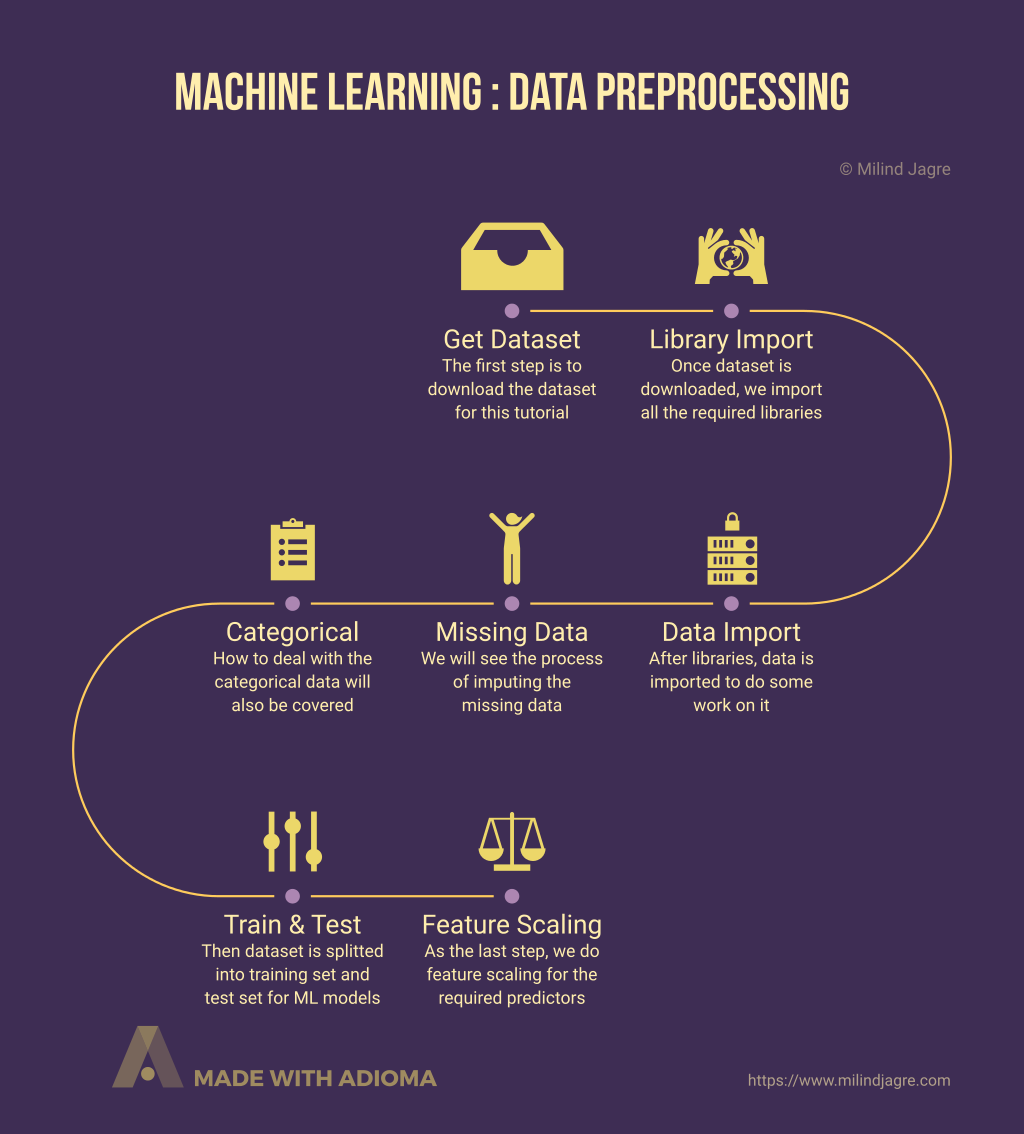

## <font color='#eb3483'> Data Exploration </font>

### <font color='#eb3483'> Missing Values </font>

In [ ]:
# Importing the library (you may need to install it first pip install missingno)
import missingno as msno 
  
# Visualize missing values as a matrix 
msno.matrix(census) 

In [ ]:
census.isna().sum()
# score no missing values!

### <font color='#eb3483'> Splitting our data frame into  feature variables  (X) and the target variable (Y) for the sklearn format </font>


In [ ]:
census.head()

In [ ]:
# the variable we are trying to predict is salary class (over or under $50k)

target_variable = "salary" 

independent_variables = census.drop(target_variable, axis=1) # feature variables
target_variable = census[target_variable] # target variable

### <font color='#eb3483'>  Check the balance of the data set </font>

In [ ]:
target_variable.value_counts(True)

We see this is an imbalanced classification problem. We probably want to think/ do some research about how we deal with this (here is a good article to start on - https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18). But for now - we will continue as is.


* remember you dont have to learn everything for the sake of learning it. But rather google and do some research for how to deal with something when you come up against it. It's good to remember that your data sets should be balanced so always check this. If not then you figure out how to try and deal with this.


### <font color='#eb3483'> Check out target variable </font>

In [ ]:
target_variable.unique() # what are the values in the target variable

For binary classification, it is better to replace the labels with `0` and `1`.

In [ ]:
target_variable = target_variable.replace({" <=50K":0, " >50K":1})

In [ ]:
target_variable.head()

### <font color='#eb3483'> Check out feature (independant) variables </font>

First check what kind of data we have.
- Numerical: 
- Categorical: 
- Ordinal: 

In [ ]:
independent_variables.head()

In [ ]:
independent_variables.dtypes

First check what kind of data we have.
- Numerical: yup
- Categorical: yup
- Ordinal: We can eyeball the data to check for ordinal variables - but also good to check with the data source incase we dont know). None of the variables appear to be ordinal(except for *education*, which is already codified).

In [ ]:
categorical_columns = independent_variables.select_dtypes([object, "category"]).columns
numerical_columns= independent_variables.select_dtypes(np.number).columns

In [ ]:
categorical_data = independent_variables[categorical_columns]
categorical_data.head()

#numerical_data= independent_variables.select_dtypes(np.number)

In [ ]:
numerical_data = independent_variables[numerical_columns]
numerical_data.head()

## <font color='#eb3483'> Categorical Data </font>


### <font color='#eb3483'>One Hot encode our categorical data </font>
For categorical data, we will do simple one hot encoding via pandas `get_dummies()`


In [ ]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True,
                                    dtype="int64"
)

In [ ]:
categorical_data_codified.head()

## <font color='#eb3483'> Numeric Data  </font>

Best practice is to split your data into train-test set before we do any processing to our numerical data.**

Why? This is because by including all the data here we are using some information from our test set to adjust our training set. (so in essence our test set is influencing our training set). which is something we do not want. 

Some processing we might consider here would be:  
a) imputing [missing values](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) using `SimpleImputer`  
b) [scaling/standardising/normalising](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) 

So we:  
1) split our data into train and test first.  
2) get the "fit" for scaling/standardsiing from the training set  
3) apply the fit ("transform") to the training data set.  
4) apply the fit ("transform") to the test data set - so that we are comparing apples with apples  


### <font color='#eb3483'>  Combining Data </font>

In [ ]:
independent_codified = pd.concat([
                            numerical_data,
                            categorical_data_codified # reset index so it matches the numerical
                        ], axis=1
)

In [ ]:
independent_codified.head()

### <font color='#eb3483'> Train/Test Split </font>


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent_codified, 
                                                    target_variable, 
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [ ]:
# training set
print(X_train.shape)
print(y_train.shape)

#testing set
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_test.head()

Now we deal with the numerical data in the train and test set separately


### <font color='#eb3483'> Processing Train Data </font>


In [ ]:
numerical_X_train = X_train[numerical_columns]
numerical_X_train.head()


In [ ]:
codified_X_train = X_train.drop(numerical_columns, axis=1)
codified_X_train.head()


### <font color='#eb3483'> Standardization </font>

In [ ]:
numerical_X_train.head()

Last week we tried out `MinMaxScaler`

A more common way to transform columns in scikit-learn is using the [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(numerical_X_train)


In [ ]:
(scaler.mean_)

In [ ]:
numerical_X_train_scaled = scaler.transform(numerical_X_train)

numerical_X_train_scaled = pd.DataFrame(              #this pops it back in data frame format 
                    numerical_X_train_scaled,
                    columns=numerical_X_train.columns) 

numerical_X_train_scaled.head() # note we list our index here - as the output was an array

Now we join the train numerical and categorical data back together 


In [ ]:
X_train_processed = pd.concat([
                            numerical_X_train_scaled,
                            codified_X_train.reset_index() # reset index so it matches the numerical
                        ], axis=1
)

In [ ]:
X_train_processed.head()

In [ ]:
X_train_processed = X_train_processed.set_index("index")


In [ ]:
print(X_train.shape)
print(X_train_processed.shape)

## <font color='#eb3483'> Processing test set </font>
Time to repeat our analysis steps

In [ ]:
numerical_X_test = X_test[numerical_columns]
numerical_X_test.head()

In [ ]:
codified_X_test = X_test.drop(numerical_columns, axis=1)
codified_X_test.head()

So now we need to transform our test numerical values  using our training scaled_fit

In [ ]:
# we skip the fit step because that was already done above in our training data :)
numerical_X_test_scaled = scaler.transform(numerical_X_test)

numerical_X_test_scaled = pd.DataFrame(              #this pops it back in data frame format 
                    numerical_X_test_scaled,
                    columns=numerical_X_test.columns) 

numerical_X_test_scaled.head() # 

Now we join the test numerical and categorical data back together 


In [ ]:
X_test_processed = pd.concat([
                            numerical_X_test_scaled,
                            codified_X_test.reset_index() # reset index so it matches the numerical
                        ], axis=1
)

In [ ]:
X_test_processed.head()

In [ ]:
X_test_processed = X_test_processed.set_index("index")


In [ ]:
print(X_test.shape)
print(X_test_processed.shape)


<hr>

### <font color='#eb3483'> Now our data is ready to rumble! </font>

In order to avoid selecting hyperparameters and evaluating on the same dataset, we are going to do [Nested cross validation](https://chrisalbon.com/machine_learning/model_evaluation/nested_cross_validation/). Basically we are going to do hyperparameter optimization within the training data using cross validation and evaluate the final model using the test dataset.

In [ ]:
# Let's rename our data set back to just train and test for ease :)
X_train = X_train_processed
X_test = X_test_processed

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


# <font color='#eb3483'> STEP 3: Hyperparameter tuning </font>

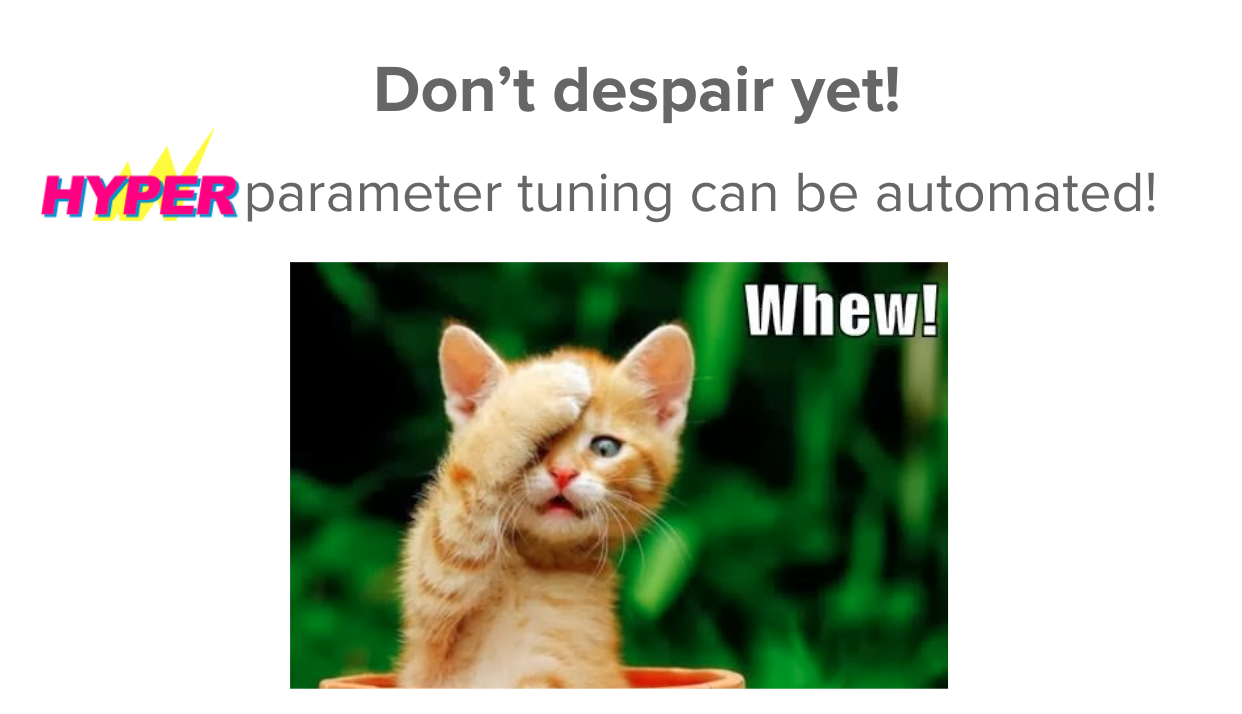

We are going to evaluate 2 models.   
To do so we are going to first perform hyperparameter optimization to get the best hyperparameters for each model using the training data (step 3)  
and   
then we will select between the two models - using the test data (step 4).

In [ ]:
RESULTS = {} #make an empty results dictionary

In [ ]:
from sklearn.model_selection import cross_validate

#this is the same funxtion we defined last week. It runs cross validation on whichever estimator/model family we specify
def evaluate_model(estimator, X, y):  #define the function evaluate_model with input arguments of (estimator, X, y)
    cv_results = cross_validate(estimator, X, y,  
                     scoring="roc_auc",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).mean().to_dict()

Scikit-learn has 2 methods for hyperparameter tuning, [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV).

`GridSearchCV` works by doing a grid search (duh!), that is, it takes a set of possible hyperparameter values and it tries all possible combinations.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

First we evaluate a Logistic Regression classifier:

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression() #instantiate logistic regression

We can get all of the estimator hyperparameters with `get_params()`

In [ ]:
clf_logistic.get_params() # these are all the hyperparameters we can tweak

We are going to define the hyperparameter grid search space.

In [ ]:
# The main paramters people tune for logistic regression are: penalty, C and intercept
search_parameters_space = {
    "penalty": ["l1", "l2"], # what is l1 & l2
    "C": np.linspace(0.1, 2, 10), # range from 0.1 - 2, with 10 values in between 
    "fit_intercept": [True, False], # fit intercept T or F
}

We create the grid search by passing the estimator, the grid search parameter dictionary, and the scoring function we want to optimize.

In [ ]:
grid = GridSearchCV(estimator=clf_logistic, 
                    param_grid=search_parameters_space,
                    scoring="roc_auc",
                    n_jobs=-1)

In [ ]:
grid

`GridSearchCV` works as an estimator, it has a `fit` method to perform the search.

**Note**: If you see the next step takes too long, it probably means your laptop is not powerful enough to run this search. Try to restart your notebook (you might have to kill it and restart) and load the data with a smaller sample (try 5000 samples for example, if that doesnt work try 2000).

In [ ]:
%%time
grid.fit(X_train, y_train)

Now we can see the performance of the best hyperparameter combination found by the grid search.

In [ ]:
print(grid.best_score_)

We can see the best params:

In [ ]:
grid.best_params_

And we can use the best trained estimator:

In [ ]:
grid.best_estimator_ # this gets the best model all packaged for us.

After fitting, Gridsearch returns the results for each one of the combinations as the attribute `cv_results_`
Which we can see as a dataframe for convenience

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score").head() 
# so we can see the test score for every possible option of our grid search

# <font color='#eb3483'> STEP 4: Prediction </font>

Once we fit a `GridSearchCV` it can be used as an estimator, it has a method `predict` that predicts using the best model.  
NOW we  evaluate the best hyperparamter model using the **test set.**

In [ ]:
RESULTS["logistic_gridsearch"] = evaluate_model(grid.best_estimator_,
                                             X_test, y_test)

In [ ]:
RESULTS

<hr>

## <font color='#eb3483'>  Randomized Search </font>

It is usually recommended to use `RandomizedSearchCV` instead of `GridSearchCV`. RandomizedSearchCV works similarly to GridSearchCV, but instead of evaluating all hyperparameter combinations, it takes a number of random hyperparameter combinations. This allows us to explore a much bigger search space in the same time it would take to do a grid search.

It's recommended to use distributions instead of ranges for continuous variables for the random search space.

### <font color='#eb3483'>  Step 3 </font>

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform 

param_dist_random = {
    "penalty": ["l1", "l2"],
    "C": uniform(loc=0.1, scale=2),
    "fit_intercept": [True, False],
    "class_weight":["balanced", None],
}

Now we perform the random search on  the same logistic regression

In [ ]:
random_search = RandomizedSearchCV(
    estimator=clf_logistic, 
    param_distributions=param_dist_random,
   scoring="roc_auc", n_jobs=-1, 
    n_iter=50)

In [ ]:
%%time
random_search.fit(X_train, y_train)

We can see the randomized search takes more or less the same time as the grid search and it explores a lot more options

In [ ]:
random_search.best_score_

In [ ]:
random_search.best_estimator_

Because we are using distributions for the hyperparameter `C`, the random search can find any value, not only the ones we specify

In [ ]:
random_search.best_params_

### <font color='#eb3483'>  Step 4 </font>


In [ ]:
RESULTS["logistic_randomizedsearch"] = evaluate_model(
    random_search.best_estimator_,
    X_test, y_test
)

In [ ]:
pd.DataFrame.from_dict(RESULTS).T


We see that scores on the unseen data are worse than on the parameter searches, and that the random search logistic regression performs a bit better.

We dont just have to test the type of searches against each other. We could also try a different model family e.g. random forest, and do a hyperparamter search for that and compare that model family against the logistic modelling family.



In [ ]:
# try a few others out for more practice on this (doing steps 3 and 4 iteratively for different algorithms

In [ ]:
# what other algorithms can we try for a classification problem?